In [ ]:
#1. Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not
#2. The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
titanic_data = pd.read_csv('/content/tested.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

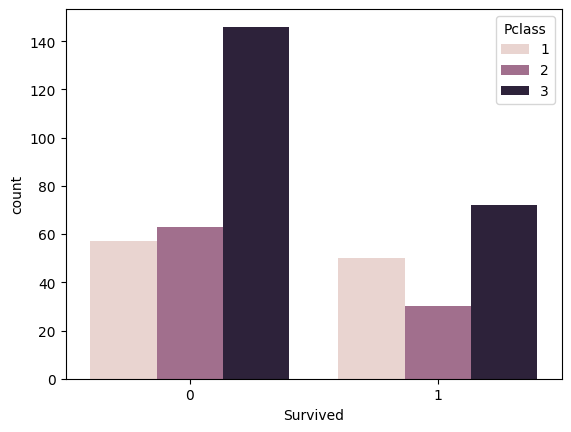

In [ ]:
sns.countplot(x=titanic_data['Survived'],hue = titanic_data['Pclass'])

<Axes: xlabel='Survived', ylabel='count'>

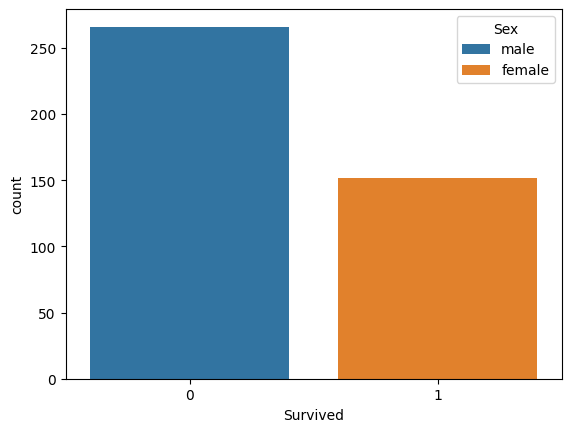

In [ ]:
sns.countplot(x=titanic_data['Survived'],hue = titanic_data['Sex'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
titanic_data['Sex'] = labelencoder.fit_transform(titanic_data['Sex'])
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

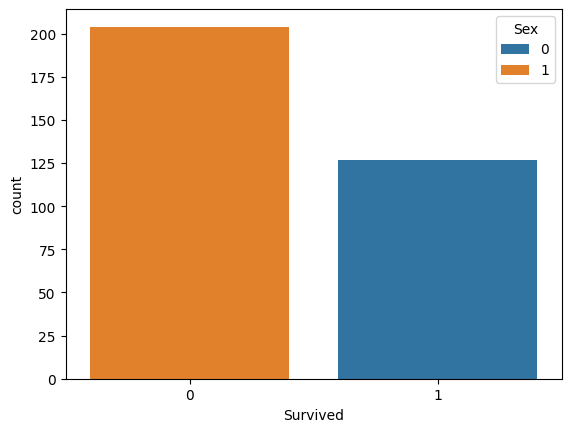

In [ ]:
sns.countplot(x=titanic_data['Survived'],hue = titanic_data['Sex'])

In [ ]:
titanic_data = titanic_data.dropna(subset=['Fare', 'Age'])
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",0,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",0,28.0,0,0,347086,7.7750,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C


In [ ]:
#Prediction based on pclass , sex , age , fare
X = titanic_data[["Pclass" , "Sex" , "Age" , "Fare"]]
y = titanic_data['Survived']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#print(X_test)

# Training the Logistic Regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0]
27     0
389    0
89     0
280    1
68     0
      ..
397    1
3      0
95     0
308    0
71     0
Name: Survived, Length: 67, dtype: int64


In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Text(33.22222222222222, 0.5, 'True')

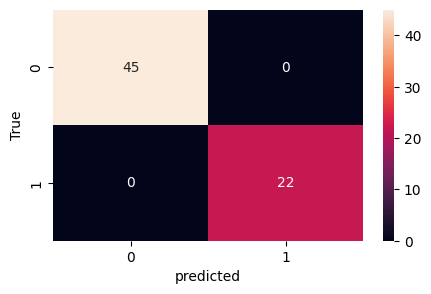

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('True')

In [ ]:
print(X_test)

     Pclass  Sex   Age     Fare
27        3    1  22.5   7.2250
389       3    1   6.0  21.0750
89        2    1   2.0  23.0000
280       3    0  23.0   8.6625
68        1    1  31.0  28.5375
..      ...  ...   ...      ...
397       1    0  48.0  79.2000
3         3    1  27.0   8.6625
95        3    1  25.0   7.7958
308       1    1  55.0  93.5000
71        3    1  21.0   7.8958

[67 rows x 4 columns]


In [ ]:
pred = classifier.predict([[3,1,6.0,21.0750]])
if pred == 1:
  print('Survived')
else:
  print('Not Survived')

Not Survived


In [ ]:
pred = classifier.predict([[3,0,23.0,8.6625]])
if pred == 1:
  print('Survived')
else:
  print('Not Survived')

Survived
